In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [19]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [20]:
X_test.shape

(10000, 32, 32, 3)

In [21]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

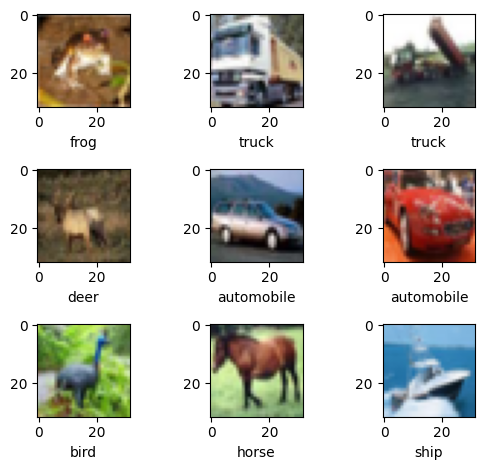

In [24]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])
    plt.tight_layout()

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
ann.fit(X_train_scaled, y_train, epochs=5)

c:\python 3.9\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.3076 - loss: 1.9299
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4154 - loss: 1.6451
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4525 - loss: 1.5488
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4789 - loss: 1.4875
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4976 - loss: 1.4314


In [29]:
y_preds = ann.predict(X_test_scaled)
y_preds = [np.argmax(i) for i in y_preds]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [32]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54      1000
           1       0.72      0.45      0.55      1000
           2       0.41      0.22      0.28      1000
           3       0.34      0.25      0.28      1000
           4       0.30      0.58      0.40      1000
           5       0.42      0.30      0.35      1000
           6       0.32      0.78      0.45      1000
           7       0.64      0.38      0.48      1000
           8       0.75      0.47      0.58      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



In [33]:
confusion_matrix(y_test, y_preds)

array([[477,  20,  65,  26, 149,  12, 116,  24,  68,  43],
       [ 30, 450,  19,  40,  47,  29, 114,  32,  33, 206],
       [ 50,  12, 218,  69, 297,  42, 267,  30,   6,   9],
       [  9,   4,  42, 246, 139, 156, 354,  20,   7,  23],
       [ 33,   3,  50,  32, 584,  20, 242,  20,   5,  11],
       [  4,   3,  57, 149, 165, 302, 268,  33,   9,  10],
       [  1,   4,  11,  21, 151,  19, 780,   3,   4,   6],
       [ 17,   6,  33,  68, 256,  64, 145, 378,   2,  31],
       [115,  45,  25,  29, 107,  46,  72,  10, 468,  83],
       [ 40,  82,  15,  49,  48,  23, 114,  40,  21, 568]], dtype=int64)

In [36]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3728 - loss: 1.7217
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5626 - loss: 1.2353
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6260 - loss: 1.0700
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6592 - loss: 0.9693
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6811 - loss: 0.9130
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7017 - loss: 0.8558
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7119 - loss: 0.8296
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7255 - loss: 0.7827
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7359 - loss: 0.7568
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7477 - loss: 0.7288


In [38]:
cnn.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6885 - loss: 0.9377


[0.9425471425056458, 0.6861000061035156]

In [46]:
y_preds = cnn.predict(X_test_scaled)
y_preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.94740214e-04, 6.10291099e-05, 3.77656921e-04, ...,
        1.17585754e-04, 1.67221427e-02, 2.21881164e-05],
       [5.17353532e-04, 2.92355521e-03, 5.58276270e-07, ...,
        2.24513897e-07, 9.93674159e-01, 2.88348692e-03],
       [3.02313659e-02, 2.86327265e-02, 4.74192202e-03, ...,
        4.89269895e-03, 8.68833184e-01, 5.01963794e-02],
       ...,
       [5.66090675e-05, 2.82391369e-07, 5.57008326e-01, ...,
        1.36897070e-02, 9.73897841e-05, 7.93130710e-07],
       [7.39583839e-03, 2.70127803e-01, 1.04489038e-03, ...,
        2.23745145e-02, 5.51382313e-04, 3.10024642e-03],
       [9.77739091e-06, 6.59292618e-06, 5.48749743e-03, ...,
        9.18799281e-01, 3.69883946e-06, 8.75281876e-06]], dtype=float32)

In [60]:
y_preds_label = [np.argmax(i) for i in y_preds]
print(y_preds_label[:5])
y_test = y_test.reshape(-1,)
print(y_test[:5])

[3, 8, 8, 0, 6]
[3 8 8 0 6]


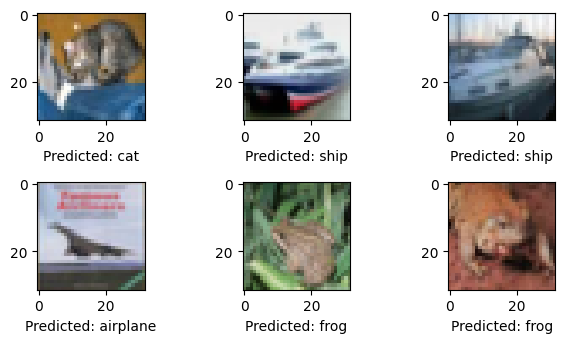

In [58]:
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    plt.xlabel(f"Predicted: {classes[y_preds_label[i]]}")
plt.tight_layout()

In [61]:
print(classification_report(y_test, y_preds_label))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.90      0.68      0.77      1000
           2       0.58      0.52      0.55      1000
           3       0.59      0.43      0.49      1000
           4       0.56      0.73      0.64      1000
           5       0.62      0.58      0.60      1000
           6       0.73      0.80      0.76      1000
           7       0.70      0.78      0.74      1000
           8       0.73      0.84      0.78      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

